In [113]:
import copy
import multiprocessing
import sys
import time
from asyncio import Queue

import numpy as np

sys.path.append('../') #server per fare l'import di file in un'altra directory sullo stesso "livello"
from src.neuralNetwork.NeuralNetwork import mean_squared_error
from src.training.Multiprocessing_gridSearch import grid_search
from src.neuralNetwork.function import ReLuFunction, SigmoideFunction, IdentityFunction, TanhFunction
from src.neuralNetwork.NeuralNetwork import NeuralNetwork, Layer
from matplotlib import pyplot as plt
from src.load_ds import load_monks, data_set_partitioning

In [114]:
target_inputs_train, target_outputs_train = load_monks('../datasets/monk/monks-3.train', shuffle=False)
target_inputs_test, target_outputs_test = load_monks('../datasets/monk/monks-3.test', shuffle=False)

In [115]:
layer1 = Layer(num_neurons = 2, num_inputs = 17, activation_function = IdentityFunction())
layer2 = Layer(num_neurons = 1, num_inputs = 2, activation_function = SigmoideFunction())
neuralNetwork2 = NeuralNetwork([layer1, layer2])

layer1 = Layer(num_neurons = 4, num_inputs = 17, activation_function = IdentityFunction())
layer2 = Layer(num_neurons = 1, num_inputs = 4, activation_function = SigmoideFunction())
neuralNetwork1 = NeuralNetwork([layer1, layer2])

layer1 = Layer(num_neurons = 3, num_inputs = 17, activation_function = IdentityFunction())
layer2 = Layer(num_neurons = 1, num_inputs = 3, activation_function = SigmoideFunction())
neuralNetwork3 = NeuralNetwork([layer1, layer2])

layer1 = Layer(num_neurons = 4, num_inputs = 17, activation_function = IdentityFunction())
layer2 = Layer(num_neurons = 2, num_inputs = 4, activation_function = ReLuFunction())
layer3 = Layer(num_neurons = 1, num_inputs = 2, activation_function = SigmoideFunction())
neuralNetwork4 = NeuralNetwork([layer1, layer2, layer3])

In [116]:
parameters_grid = {
    'model': [neuralNetwork3],
    'learning_rate': [0.04],
    'momentum_term': [0.5],
    'regularization_term': [0],
    'epochs': [200]
}

Processo 57648 avviato
Process  57648  terminated


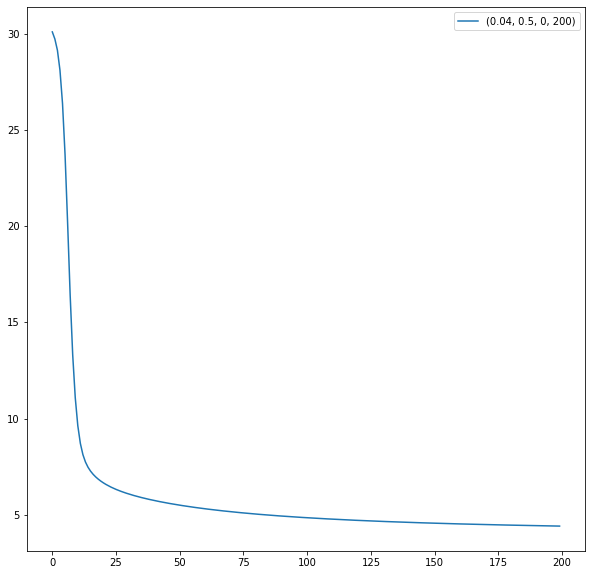

In [117]:
models_error = grid_search(parameters_grid, target_inputs=target_inputs_train, target_outputs=target_outputs_train)
plt.figure(figsize=(10, 10))
for param, error_list in models_error:
    plt.plot(error_list, label=f"{param}")
plt.legend()
plt.show()

In [118]:
def get_accuracy(neuralNetwork, target_inputs, target_outputs):
    output_nn = neuralNetwork.predict(target_inputs)

    output_nn = np.matrix(np.where(output_nn >= 0.5, 1, output_nn))
    output_nn = np.matrix(np.where(output_nn < 0.5, 0, output_nn))
    incorrect_prediction = np.sum(np.abs(target_outputs - output_nn))

    accuracy = (1- incorrect_prediction / target_outputs.shape[0])*100
    return accuracy

get_accuracy(neuralNetwork=neuralNetwork1, target_inputs=target_inputs_test, target_outputs=target_outputs_test)

52.77777777777778